In [1]:
import pandas as pd

In [2]:
players = pd.read_csv("data/0-1-IneriaRanks.csv")
players=players.set_index(players.columns[0])
pairs = pd.read_csv("data/0-1-PlayerPairs.csv")
pairs.head()

,Unnamed: 0,player1,player2
0,0,Carlos Alcaraz,Nicolas Jarry
1,1,Alexander Zverev,Matteo Berrettini
2,2,Frances Tiafoe,Grigor Dimitrov
3,3,Alejandro Davidovich Fokina,Holger Rune
4,4,Daniil Medvedev,Marton Fucsovics


In [3]:
_dictionary = pd.read_csv("data_dictionary.csv")
_data = pd.read_csv("Wimbledon_featured_matches.csv")

In [4]:
dictionary = _dictionary.copy()
data = _data.copy()

# Sliding Window Estimation

$$
P_i\approx\frac{\Bbb N[W_{t-w}^{t}]}{w}
$$

- where $w$ is the length of the window
- where $t$ is current time

$$
P_2=1-P_1
$$

> proof:
> $$
>
> $$

In [5]:
WINDOW = 10

In [6]:
from utils import database as db

In [7]:
eg1, win_series = db.select_match(data, "Carlos Alcaraz", "Nicolas Jarry")

eg1

/data1/yz812/mcm/utils/database.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eg1["p1_score"][eg1["p1_score"] == 'AD'] = 60
/data1/yz812/mcm/utils/database.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eg1["p2_score"][eg1["p2_score"] == 'AD'] = 60


,match_id,player1,player2,elapsed_time,set_no,game_no,p1_sets,p2_sets,p1_games,p2_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
point_no,,,,,,,,,,,,,,,,,,,,,
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,2024-02-05 00:00:00,1,1,0,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,2024-02-05 00:00:38,1,1,0,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,2024-02-05 00:01:01,1,1,0,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,2024-02-05 00:01:31,1,1,0,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
5,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,2024-02-05 00:02:21,1,1,0,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,2024-02-05 03:53:25,4,12,2,1,6,5,...,0,0,0,10.044,9.281,2,130.0,BW,NCTL,ND
297,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,2024-02-05 03:54:01,4,12,2,1,6,5,...,0,0,0,52.318,58.723,14,113.0,BW,NCTL,ND
298,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,2024-02-05 03:55:02,4,12,2,1,6,5,...,0,0,1,2.056,1.509,1,129.0,B,NCTL,ND


In [8]:
win_series

point_no
1      False
2      False
3       True
4      False
5       True
       ...  
296     True
297    False
298    False
299     True
300     True
Name: p1_score, Length: 300, dtype: bool

In [9]:
from utils import database as db
#P = win_series.astype(int).rolling(window=WINDOW, min_periods=1).mean().fillna(0)
P = db.expected_P(win_series.astype(int), 0.2, WINDOW)
P

0      0.000000
1      0.000000
2      0.200000
3      0.160000
4      0.328000
         ...   
295    0.786017
296    0.521439
297    0.524526
298    0.512246
299    0.717171
Length: 300, dtype: float64

In [10]:
P=P.reset_index().set_index(eg1['elapsed_time'])
P

,index,0
elapsed_time,,
2024-02-05 00:00:00,0,0.000000
2024-02-05 00:00:38,1,0.000000
2024-02-05 00:01:01,2,0.200000
2024-02-05 00:01:31,3,0.160000
2024-02-05 00:02:21,4,0.328000
...,...,...
2024-02-05 03:53:25,295,0.786017
2024-02-05 03:54:01,296,0.521439
2024-02-05 03:55:02,297,0.524526


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils import visualize as vs
sns.set_style("darkgrid")

/home/yz812/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yz812/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


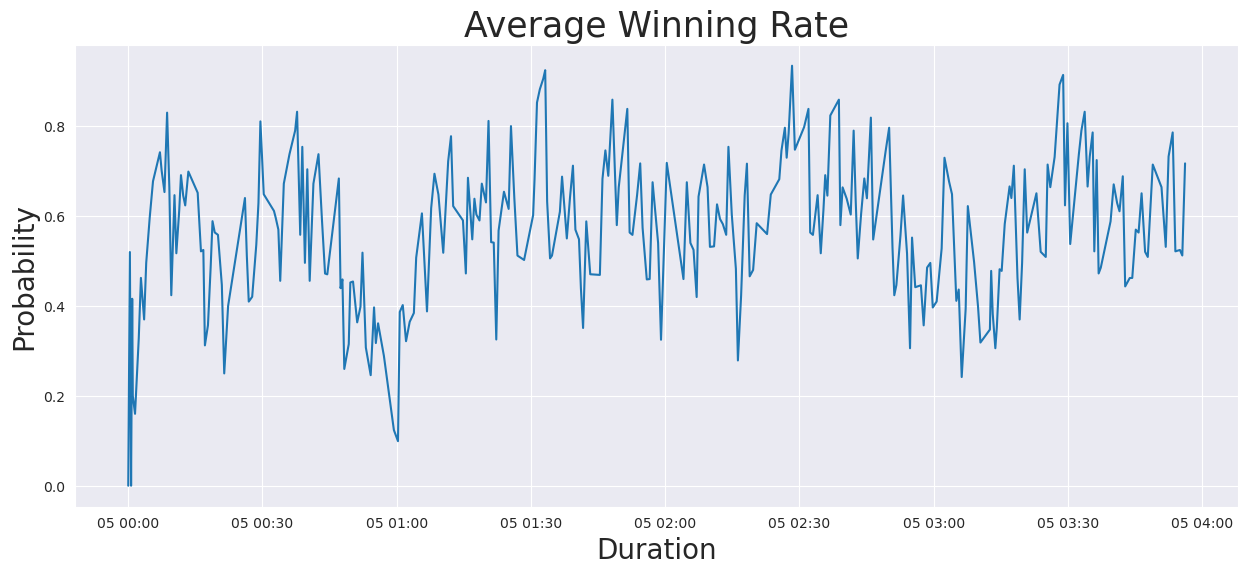

In [12]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=P.index, y=P[0])
vs.set_label('Average Winning Rate', "Duration", "Probability")
vs.save('1-0-SlidingWIndowEG')
plt.show()

## Different Size of Window

In [13]:
WINDOW_S = [10,25]

In [14]:
eg1["new set"] = eg1["set_no"] != eg1["set_no"].shift(1)
new_set = []

for index, row in eg1.iterrows():
    if row["new set"]:
        new_set += [row["elapsed_time"]]
new_set

[Timestamp('2024-02-05 00:00:00'),
 Timestamp('2024-02-05 00:47:04'),
 Timestamp('2024-02-05 02:04:05'),
 Timestamp('2024-02-05 02:49:17')]

/home/yz812/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yz812/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yz812/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yz812/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

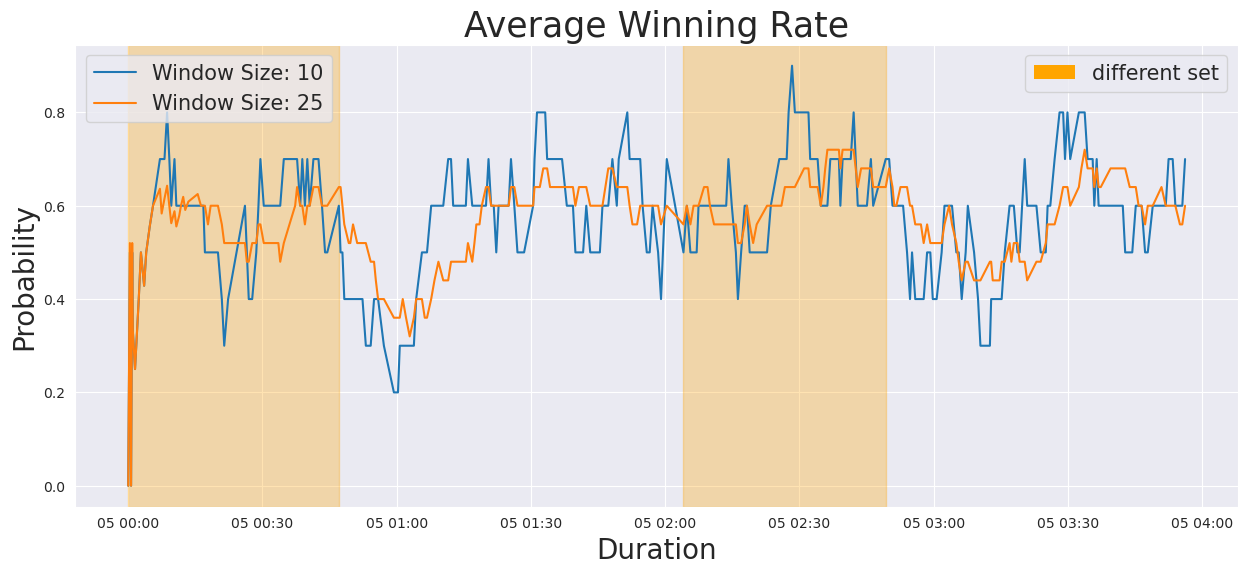

In [15]:
plt.figure(figsize=(15, 6))

for w in WINDOW_S:
    P_w = win_series.astype(int).rolling(window=w, min_periods=1).mean().fillna(0)
    P_w=P_w.reset_index().set_index(pd.to_datetime(eg1['elapsed_time'], format='%H:%M:%S'))
    sns.lineplot(x=P_w.index, y='p1_score', data=P_w, label=f"Window Size: {w}")

vs.set_label('Average Winning Rate', "Duration", "Probability")
plt.axvspan(new_set[0], new_set[1], color='orange', alpha=0.3)
plt.axvspan(new_set[2], new_set[3], color='orange', alpha=0.3)
vs.set_caption(True)
vs.save('1-0-SlidingWIndowEG')
plt.show()

## different players

[Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-05 00:47:04'), Timestamp('2024-02-05 02:04:05'), Timestamp('2024-02-05 02:49:17'), Timestamp('2024-02-05 03:56:11')]
Carlos Alcaraz Nicolas Jarry


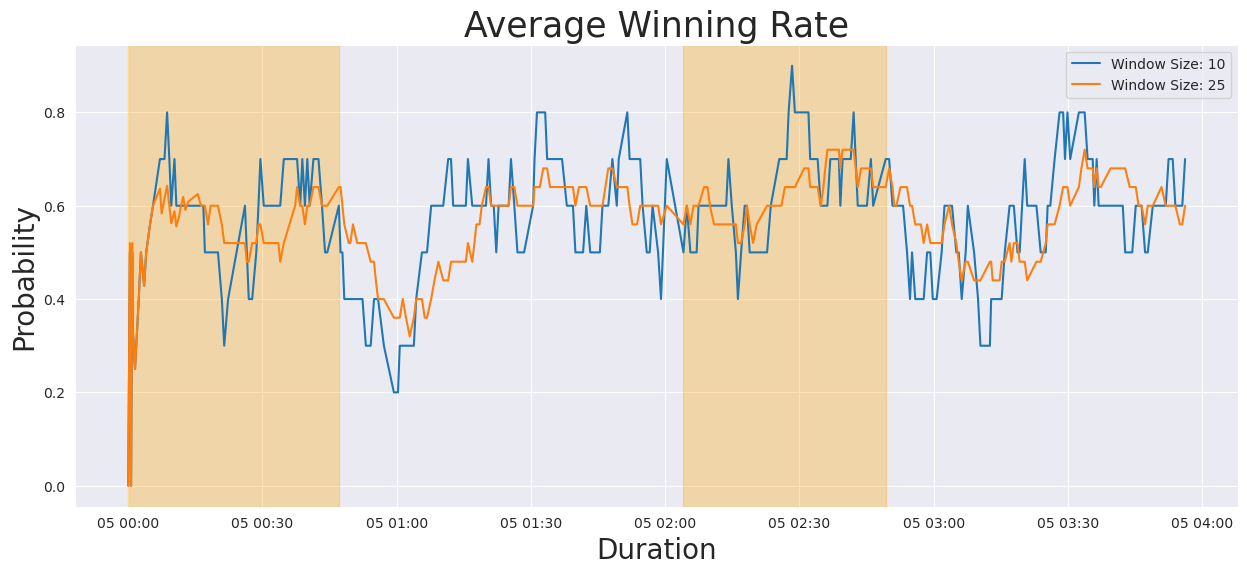

[Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-05 00:35:02'), Timestamp('2024-02-05 02:11:25'), Timestamp('2024-02-05 03:13:32')]
Alexander Zverev Matteo Berrettini


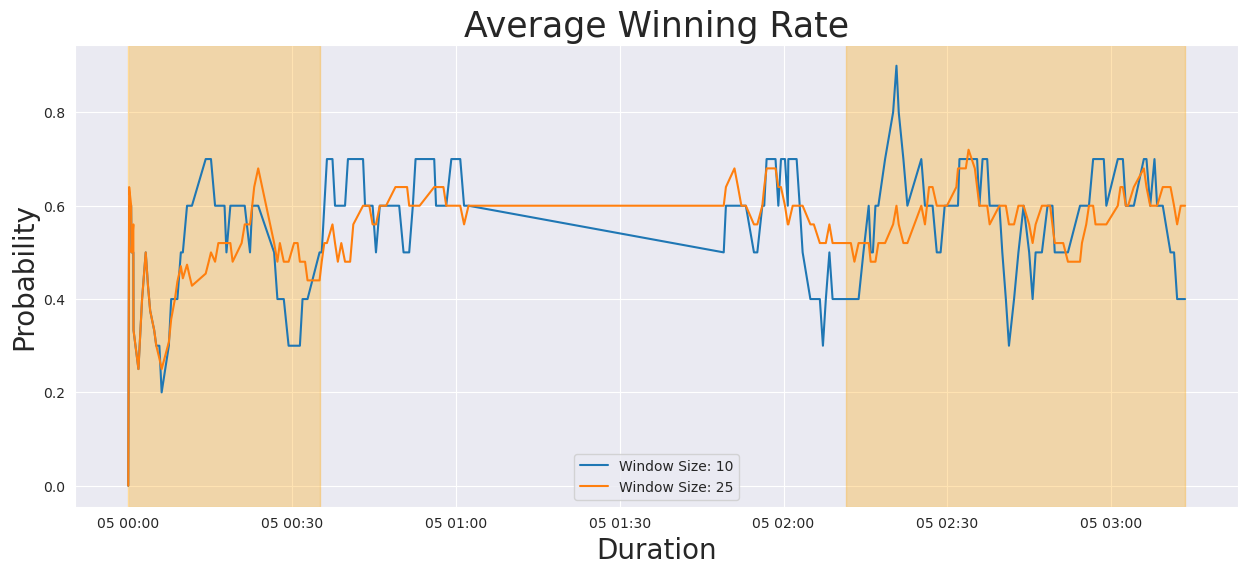

[Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-05 00:34:02'), Timestamp('2024-02-05 01:06:59'), Timestamp('2024-02-05 01:37:54')]
Frances Tiafoe Grigor Dimitrov


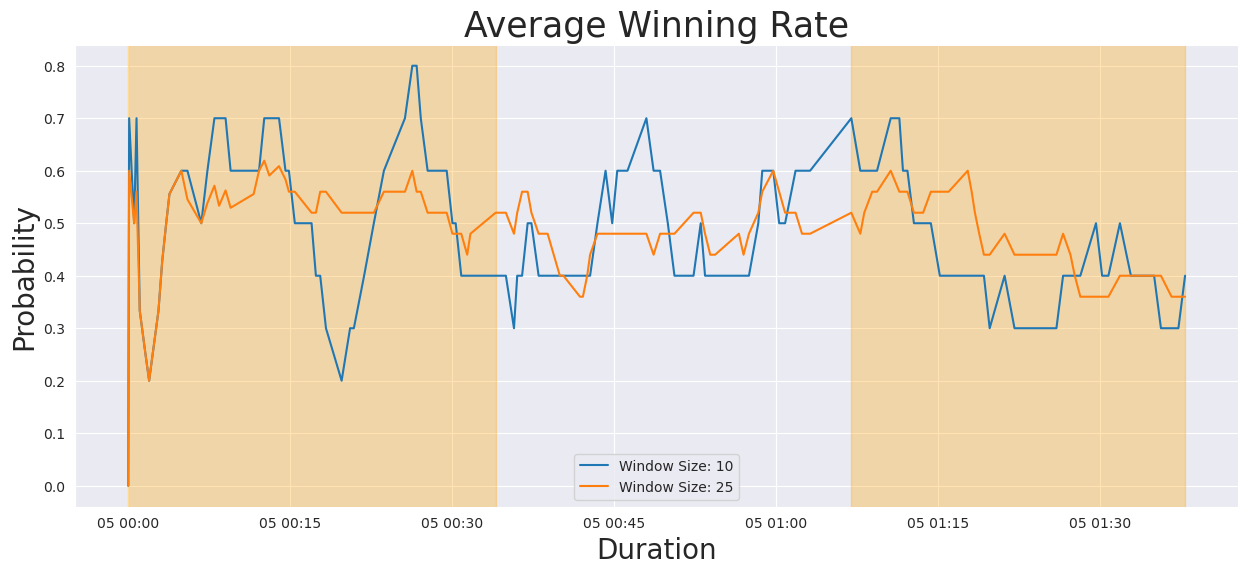

[Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-05 00:37:19'), Timestamp('2024-02-05 01:17:50'), Timestamp('2024-02-05 02:25:18'), Timestamp('2024-02-05 03:11:47'), Timestamp('2024-02-05 04:19:56')]
Alejandro Davidovich Fokina Holger Rune


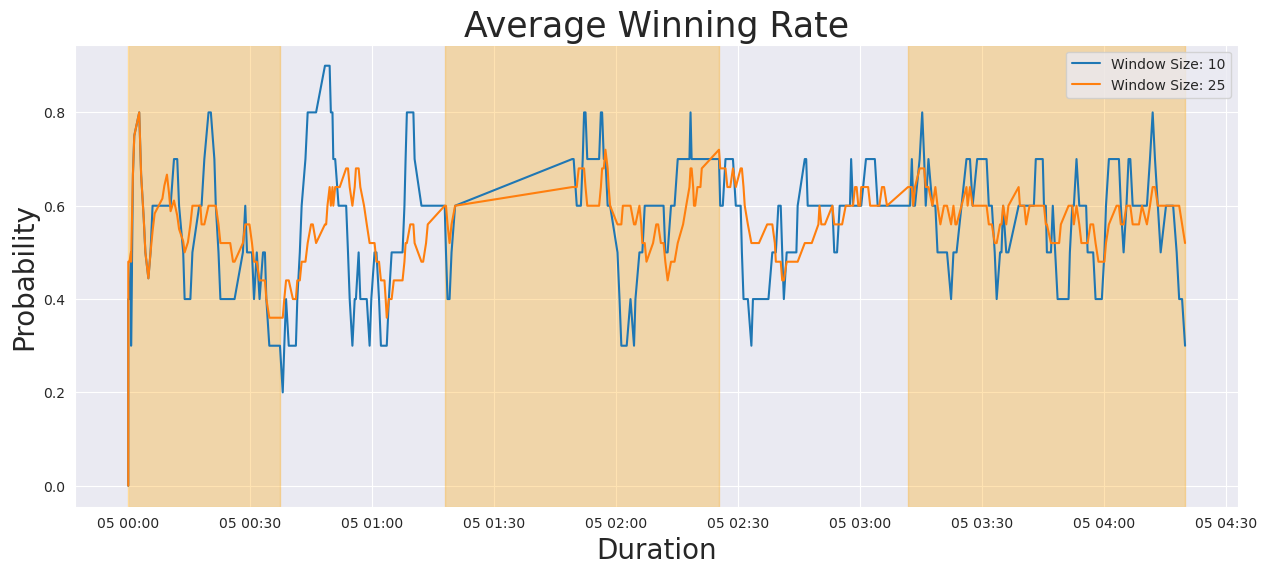

[Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-05 00:40:18'), Timestamp('2024-02-05 01:19:54'), Timestamp('2024-02-05 02:14:03'), Timestamp('2024-02-05 03:04:23')]
Daniil Medvedev Marton Fucsovics


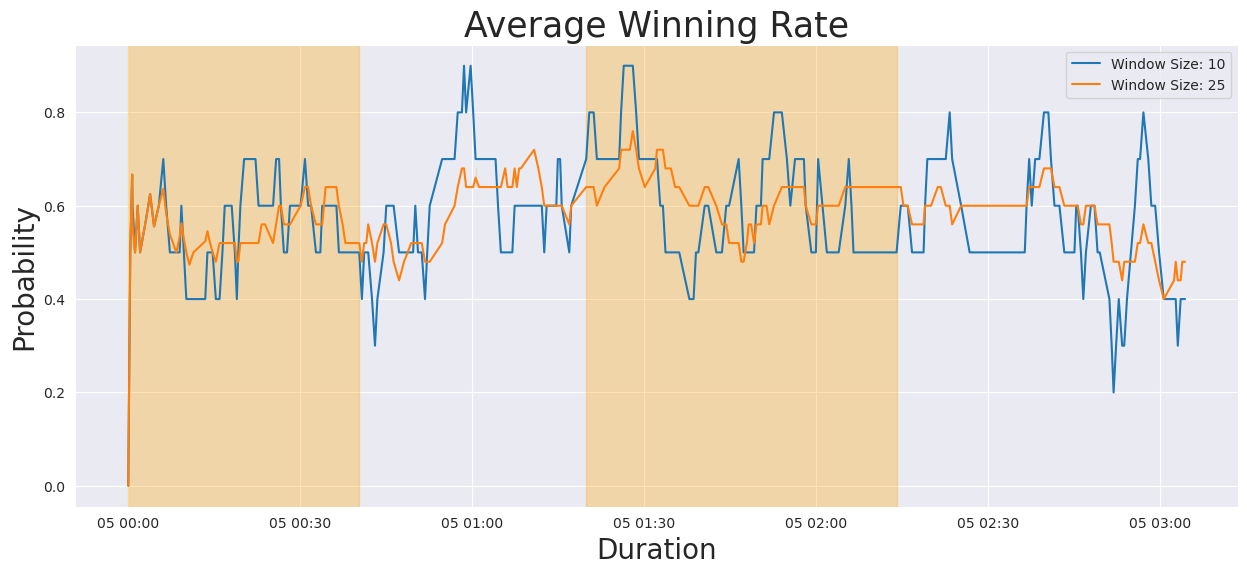

In [16]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

for index, row in pairs.head().iterrows():
    player1 = row["player1"]
    player2 = row["player2"]

    match_i, win_series_i = db.select_match(data, player1, player2)


    match_i["new set"] = match_i["set_no"] != match_i["set_no"].shift(1)
    new_set = []

    for _index, _row in match_i.iterrows():
        if _row["new set"]:
            new_set += [_row["elapsed_time"]]
    new_set.append(max(match_i["elapsed_time"]))
    
    
    plt.figure(figsize=(15, 6))

    for w in WINDOW_S:
        P_i_w = win_series_i.astype(int).rolling(window=w, min_periods=1).mean().fillna(0)
        P_i_w = P_i_w.reset_index().set_index(match_i['elapsed_time'])
        sns.lineplot(x=P_i_w.index, y='p1_score', data=P_i_w, label=f"Window Size: {w}")

    vs.set_label('Average Winning Rate', "Duration", "Probability")

    for i in range(len(new_set)):
        if i%2==0 and i+1<len(new_set):
            plt.axvspan(new_set[i], new_set[i+1], color='orange', alpha=0.3, label=f'Interval {i}')
    
    #vs.save('1-0-SlidingWIndowEG')
    print(new_set)
    print(player1, player2)
    plt.show()

# Angular Momentum & Rotary Kinetic Energy

$$
\begin{cases}
K_i=\frac12 I_i\omega^2_i\\
I_1\omega_1+I_2\omega_2=1\\
\hat P_1=\frac{K_1}{K_1+K_2},~\hat P_2=1-\hat P_1
\end{cases}
$$

- therefore, given current estimated probability(winning rate) $P$, the Rotary Kinetic Energy $K$ will be:
$$
\omega_1 = \cdots \\ 
\omega_2 = \cdots
$$

In [17]:
from utils import database as db

In [18]:
players

,Inertia
0,
Alexander Bublik,0.632432
Roman Safiullin,0.625641
Jannik Sinner,0.601458
Denis Shapovalov,0.600000
Carlos Alcaraz,0.594035
Daniil Medvedev,0.591398
Stefanos Tsitsipas,0.588235
Novak Djokovic,0.581864
Jiri Lehecka,0.581325


In [19]:
I1 = players["Inertia"]["Carlos Alcaraz"]
I2 = players["Inertia"]["Nicolas Jarry"]

print(I1,I2)

0.5940347970173985 0.54


In [20]:
P

,index,0
elapsed_time,,
2024-02-05 00:00:00,0,0.000000
2024-02-05 00:00:38,1,0.000000
2024-02-05 00:01:01,2,0.200000
2024-02-05 00:01:31,3,0.160000
2024-02-05 00:02:21,4,0.328000
...,...,...
2024-02-05 03:53:25,295,0.786017
2024-02-05 03:54:01,296,0.521439
2024-02-05 03:55:02,297,0.524526


In [21]:
w1, w2 = db.get_velocity(P[0], I1, I2)
w1

elapsed_time
2024-02-05 00:00:00   -0.000000
2024-02-05 00:00:38   -0.000000
2024-02-05 00:01:01    0.579112
2024-02-05 00:01:31    0.528609
2024-02-05 00:02:21    0.711887
                         ...   
2024-02-05 03:53:25    1.124167
2024-02-05 03:54:01    0.879800
2024-02-05 03:55:02    0.882398
2024-02-05 03:55:34    0.872066
2024-02-05 03:56:11    1.052953
Name: 0, Length: 300, dtype: float64

<AxesSubplot: xlabel='elapsed_time', ylabel='0'>

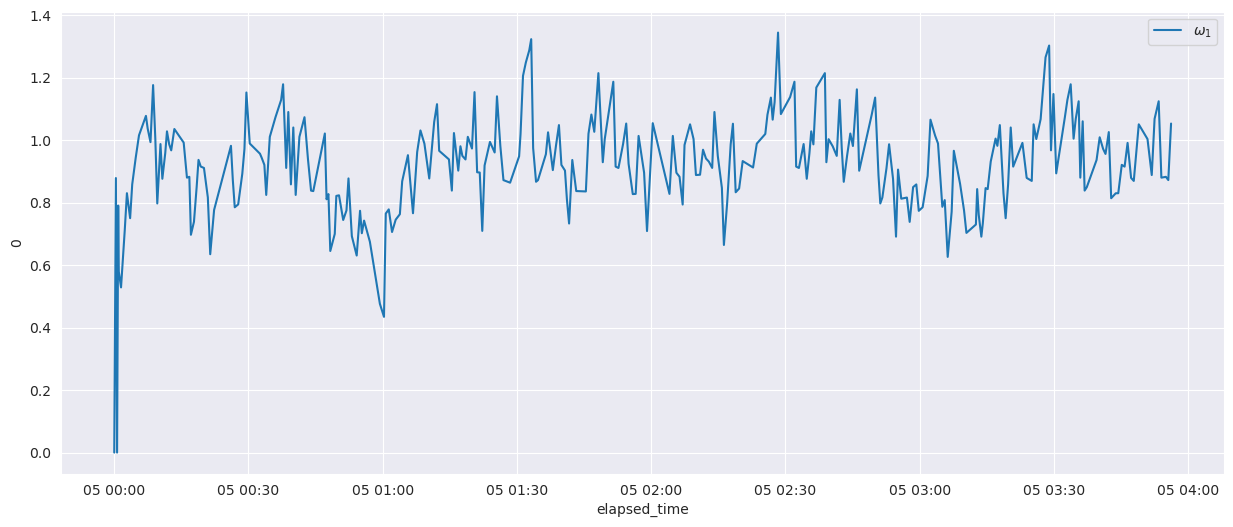

In [22]:
plt.figure(figsize=(15, 6))
#sns.lineplot(x=P.index, y='p1_score', data=P, label=r"$P$")
sns.lineplot(x=P.index, y=w1, label=r"$\omega_1$")
#sns.lineplot(x=P.index, y=w2, label=r"$\omega_2$")

<AxesSubplot: xlabel='elapsed_time', ylabel='0'>

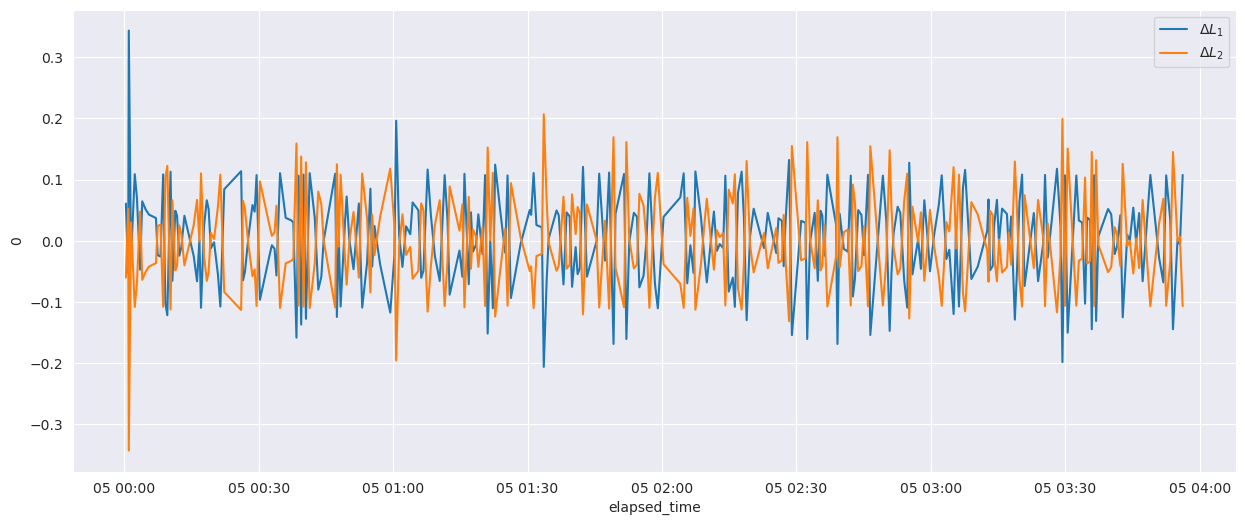

In [23]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=P.index, y=w1.diff()*I1, label=r"$\Delta L_1$")
sns.lineplot(x=P.index, y=w2.diff()*I2, label=r"$\Delta L_2$")

## Different Window Size

$$
\kappa(t)=\lambda(1-\lambda)^{t-1}
$$

$$
P_t=\Bbb E[P]_{\delta(t)}\approx (P*\kappa)(t)
$$

- the properties of the forgetfulness from geometric distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


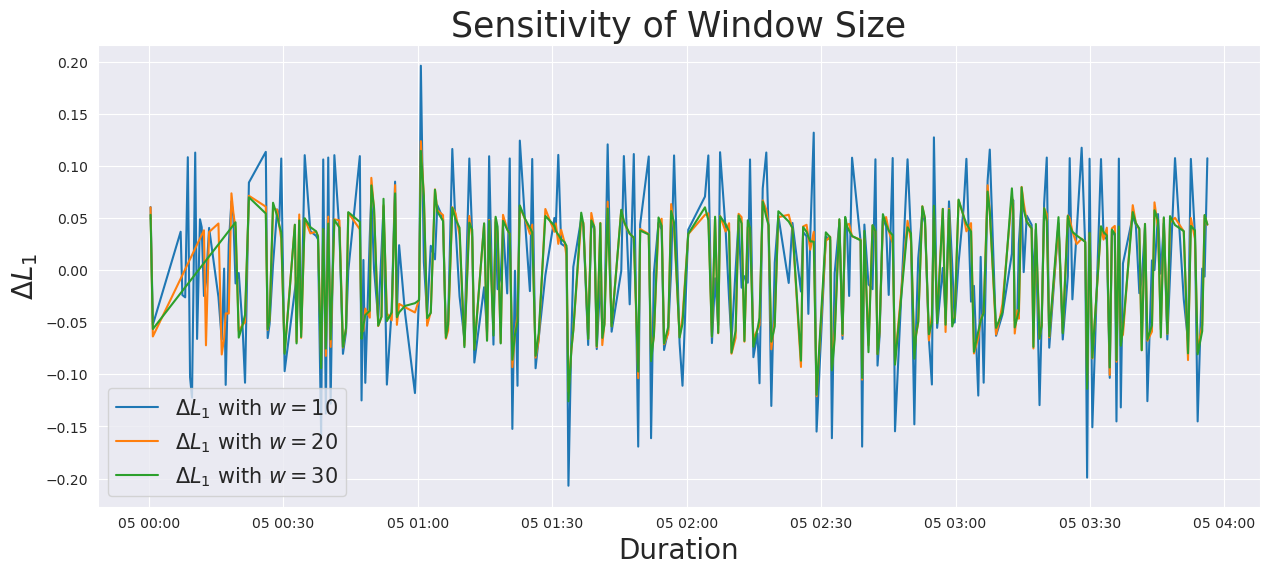

In [24]:
from utils import visualize as vs

plt.figure(figsize=(15, 6))

WINDOW_S = [10,20,30]
for w in WINDOW_S:
    P_i_w =  db.expected_P(win_series.astype(int), 0.2, w)
    P_i_w = P_i_w.reset_index().set_index(eg1['elapsed_time'])

    w1_w, w2_w = db.get_velocity(P_i_w[0], I1, I2)

    sns.lineplot(x=P.index[w:], y=(w1_w.diff()*I1)[w:], label=r"$\Delta L_1$ with $w=$"+str(w))
vs.set_caption()
vs.set_label("Sensitivity of Window Size", "Duration", r"$\Delta L_1$")
vs.save("7-1-SenseOfWindow")

In [25]:
import pandas as pd
t = pd.to_datetime([0,1,2,3])
t

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003'],
              dtype='datetime64[ns]', freq=None)

In [26]:
type(t)

pandas.core.indexes.datetimes.DatetimeIndex

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


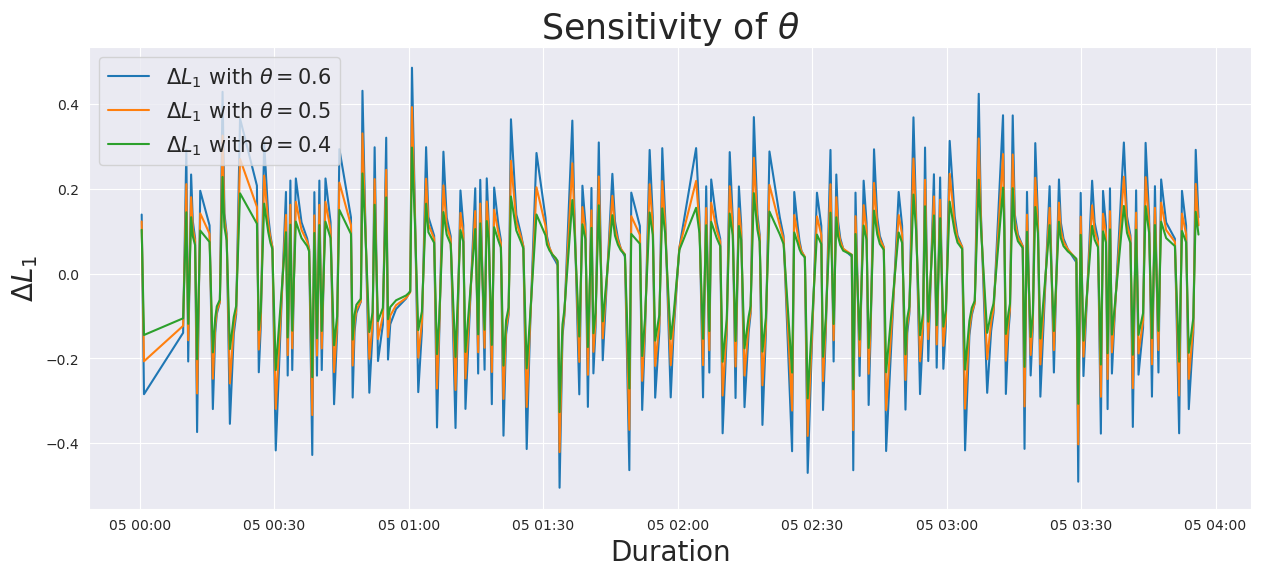

In [27]:
plt.figure(figsize=(15, 6))
WINDOW_S = [0.6,0.5,0.4]
for w in WINDOW_S:
    P_i_w =  db.expected_P(win_series.astype(int), w, 30)
    P_i_w = P_i_w.reset_index().set_index(eg1['elapsed_time'])

    w1_w, w2_w = db.get_velocity(P_i_w[0], I1, I2)

    sns.lineplot(x=P.index[15:], y=(w1_w.diff()*I1)[15:], label=r"$\Delta L_1$ with $\theta=$"+str(w))

vs.set_caption()
vs.set_label(r"Sensitivity of $\theta$", "Duration", r"$\Delta L_1$")
vs.save("7-1-SenseOfTheta")